Saving room.jpg to room.jpg


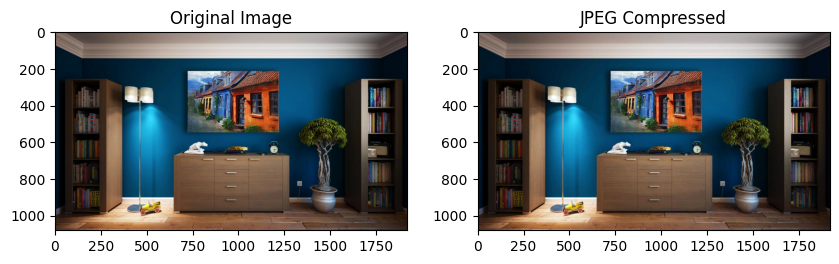

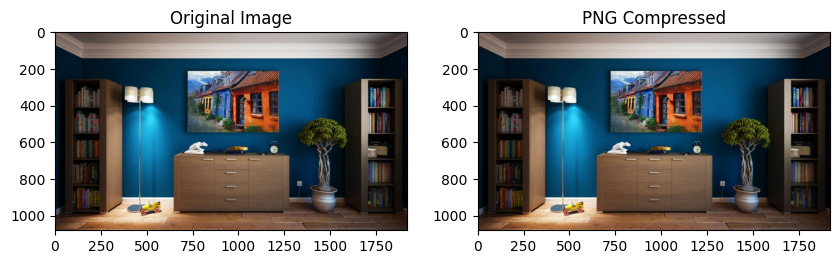

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.8983 - loss: 0.3283 - val_accuracy: 0.9804 - val_loss: 0.0641
Epoch 2/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.9825 - loss: 0.0567 - val_accuracy: 0.9871 - val_loss: 0.0478
Epoch 3/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9889 - loss: 0.0332 - val_accuracy: 0.9882 - val_loss: 0.0409
Epoch 4/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9935 - loss: 0.0216 - val_accuracy: 0.9873 - val_loss: 0.0398
Epoch 5/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9944 - loss: 0.0172 - val_accuracy: 0.9879 - val_loss: 0.0445
Epoch 6/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9949 - loss: 0.0145 - val_accuracy: 0.9902 - val_loss: 0.0439
Epoch 7/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9966 - loss: 0.0106 - val_accuracy: 0.9915 - val_loss: 0.0405
Epoch 8/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9977 - loss: 0.007

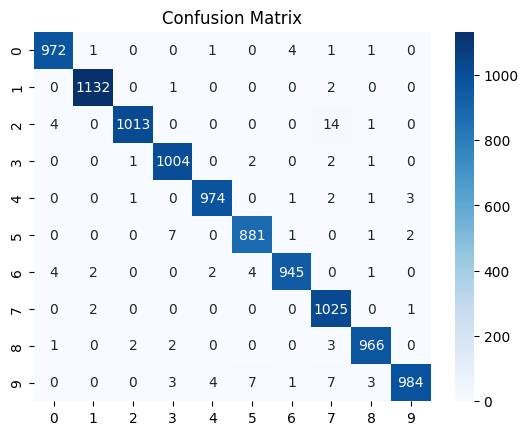

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      1.00      1.00      1135
           2       1.00      0.98      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.97      1.00      0.98      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


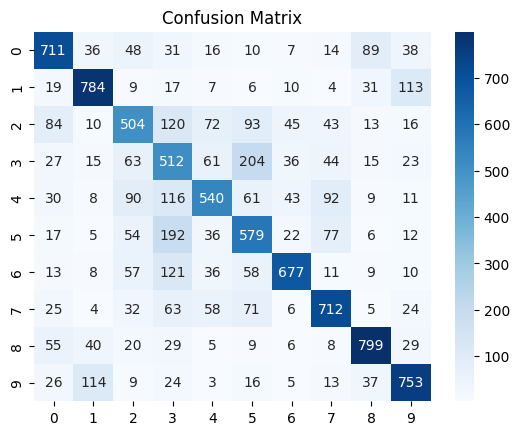

              precision    recall  f1-score   support

           0       0.71      0.71      0.71      1000
           1       0.77      0.78      0.77      1000
           2       0.57      0.50      0.53      1000
           3       0.42      0.51      0.46      1000
           4       0.65      0.54      0.59      1000
           5       0.52      0.58      0.55      1000
           6       0.79      0.68      0.73      1000
           7       0.70      0.71      0.71      1000
           8       0.79      0.80      0.79      1000
           9       0.73      0.75      0.74      1000

    accuracy                           0.66     10000
   macro avg       0.66      0.66      0.66     10000
weighted avg       0.66      0.66      0.66     10000



In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.datasets import mnist, cifar10
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

def image_compression(img_path, img_format, compression_level=90):
    img = cv2.imread(img_path)
    encode_param = [int(cv2.IMWRITE_JPEG_QUALITY if img_format == 'jpeg' else cv2.IMWRITE_PNG_COMPRESSION), compression_level]
    success, encoded_img = cv2.imencode(f'.{img_format}', img, encode_param)
    decoded_img = cv2.imdecode(encoded_img, cv2.IMREAD_COLOR)
    return img, decoded_img

from google.colab import files
uploaded_files = files.upload()
file_path = list(uploaded_files.keys())[0]
original_img, jpeg_img = image_compression(file_path, 'jpeg', 50)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1), plt.imshow(cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)), plt.title('Original Image')
plt.subplot(1,2,2), plt.imshow(cv2.cvtColor(jpeg_img, cv2.COLOR_BGR2RGB)), plt.title('JPEG Compressed')
plt.show()

original_img, png_img = image_compression(file_path, 'png', 3)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1), plt.imshow(cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)), plt.title('Original Image')
plt.subplot(1,2,2), plt.imshow(cv2.cvtColor(png_img, cv2.COLOR_BGR2RGB)), plt.title('PNG Compressed')
plt.show()

def cnn_model(input_dim, output_classes):
    model = keras.Sequential([
        layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=input_dim),
        layers.MaxPooling2D(pool_size=(2,2)),
        layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
        layers.MaxPooling2D(pool_size=(2,2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(output_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

def process_mnist():
    (train_imgs, train_labels), (test_imgs, test_labels) = mnist.load_data()
    train_imgs, test_imgs = train_imgs / 255.0, test_imgs / 255.0
    train_imgs, test_imgs = np.expand_dims(train_imgs, -1), np.expand_dims(test_imgs, -1)
    return (train_imgs, train_labels), (test_imgs, test_labels)

(train_data_mnist, label_data_mnist), (test_data_mnist, test_labels_mnist) = process_mnist()
mnist_network = cnn_model((28,28,1), 10)
history_mnist = mnist_network.fit(train_data_mnist, label_data_mnist, epochs=50, validation_split=0.2, verbose=1)

def process_cifar():
    (train_imgs, train_labels), (test_imgs, test_labels) = cifar10.load_data()
    train_imgs, test_imgs = train_imgs / 255.0, test_imgs / 255.0
    return (train_imgs, train_labels), (test_imgs, test_labels)

(train_data_cifar, label_data_cifar), (test_data_cifar, test_labels_cifar) = process_cifar()
cifar_network = cnn_model((32,32,3), 10)
history_cifar = cifar_network.fit(train_data_cifar, label_data_cifar, epochs=50, validation_split=0.2, verbose=1)

def model_analysis(model, test_imgs, test_labels):
    predictions = np.argmax(model.predict(test_imgs), axis=1)
    conf_matrix = confusion_matrix(test_labels, predictions)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.show()
    print(classification_report(test_labels, predictions))

model_analysis(mnist_network, test_data_mnist, test_labels_mnist)
model_analysis(cifar_network, test_data_cifar, test_labels_cifar)